In [4]:
# Regresion Lineal
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [6]:
fichero="./vehiculos_procesado.csv"

In [7]:
df=pd.read_csv(fichero)

In [8]:
df.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,consumo_std,desplazamiento_std
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,-0.653195,-0.613385
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,0.676220
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,-0.881324,-0.613385
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,0.676220
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,-0.881324,0.372783


In [9]:
df=df[["consumo","co2","cilindros","desplazamiento"]]

In [10]:
df.shape

(35539, 4)

In [12]:
modelo=smf.ols('co2~desplazamiento+cilindros+consumo',data=df).fit()

In [14]:
modelo.params

Intercept         817.945789
desplazamiento     11.767880
cilindros           1.237911
consumo           -19.803556
dtype: float64

In [15]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 1.602e+05
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:11:31   Log-Likelihood:            -1.6808e+05
No. Observations:               35539   AIC:                         3.362e+05
Df Residuals:                   35535   BIC:                         3.362e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        817.9458      1.585    515.944      0.000     814.838     821.053
desplazamiento    11.7679      0.280     42.018      0.000      11.219      12.317
cilindros          1.2379      0.201      6.148      0.000       0.843       1.633
consumo          -19.8036      0.051   -385.094      0.000     -19.904     -19.703
==============================================================================
Omnibus:                     6648.550   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15646.057
Skew:                           1.061   Prob(JB):                         0.00
Kurtosis:                       5.463   Cond. No.                         233.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$Y=817+11.7\times desplazamiento + 1.23\times cilindros -19.8 \times consumo$$

In [17]:
parametros=modelo.params.to_dict()
modelo_formula="y~{Intercept:.3f} + {cilindros:.2f}* cilindros + {consumo:.2f}*consumo + {desplazamiento:.2f}".format(**parametros)

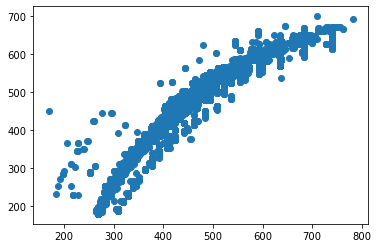

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df.co2,modelo.predict(df))

In [21]:
variable_independiente=["desplazamiento","cilindros","consumo"]
variable_dependiente=["co2"]

In [22]:
X=df[variable_independiente]
y=df[variable_dependiente]

In [23]:
modelo=LinearRegression()

In [24]:
modelo_ajustad=modelo.fit(X,y)

In [25]:
y_pred=modelo_ajustad.predict(X)

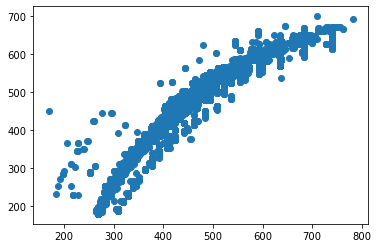

In [27]:
plt.scatter(y,y_pred)

In [29]:
modelo_ajustad.coef_

array([[ 11.76787991,   1.23791071, -19.80355606]])

In [30]:
modelo_ajustad.intercept_

array([817.94578865])

In [31]:
modelo_ajustad.feature_names_in_

array(['desplazamiento', 'cilindros', 'consumo'], dtype=object)

In [33]:
(y-y_pred).mean()

co2   -4.548561e-14
dtype: float64